In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#open the file - delete file later
azdias = pd.read_csv("azdias_null.csv.zip",compression='gzip')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
print(azdias.shape)

(891221, 367)


In [5]:
#change the unamed column name to  delete 
azdias.rename(columns={'Unnamed: 0': "delete"}, inplace= True)

In [6]:
#drop columns which have more than 50% missing values from azdias and customers
drop_azdias = ['delete', 'AGER_TYP', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ']
azdias.drop(columns= drop_azdias, inplace=True)

In [7]:
print(azdias.shape)

(891221, 357)


In [24]:
# list = azdias.isnull().sum().sort_values(ascending=False).nlargest(270)
# azdias['CAMEO_INTL_2015_2'] = pd.to_numeric(azdias['CAMEO_INTL_2015'], errors = 'coerce', downcast ='float')

In [27]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 357 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(264), int64(87), object(6)
memory usage: 2.4+ GB


In [86]:
#get the list of column names with dtype as object
obj_list = azdias.select_dtypes(include='object').columns
obj_list

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'CAMEO_DEU_2015_2', 'CAMEO_DEUG_2015_2', 'CAMEO_INTL_2015_2'],
      dtype='object')

In [87]:
#convert object dtype columns to ints dtype

def convertobjects(dataset):
    dataset['CAMEO_DEU_2015_2'] = dataset['CAMEO_DEU_2015'].astype(str).str[0]   #get the first element of the string
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015'].astype(str).str[0]
    dataset['CAMEO_INTL_2015_2'] = dataset['CAMEO_INTL_2015'].astype(str).str[0]
    
    CAMEI_dict = {"1": 1, "2": 2, "3": 3, "4": 4, "5":5, "6":6, "7":7, "8": 8, "9":9}   #convert to int dtype
    dataset['CAMEO_DEU_2015_2']= dataset['CAMEO_DEU_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_INTL_2015_2']= dataset['CAMEO_INTL_2015_2'].map(CAMEI_dict)
    
    dataset['OST_WEST_KZ']= dataset['OST_WEST_KZ'].map({"W":1 , "O":0})
    
    
    

In [88]:
convertobjects(azdias)

In [94]:
#drop the object dtype columns
object_dtype_drop = ['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM']
azdias.drop(columns= object_dtype_drop, inplace=True)

In [95]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 355 entries, LNR to CAMEO_INTL_2015_2
dtypes: float64(268), int64(87)
memory usage: 2.4 GB


In [117]:
#get the columns with respective unique data groups
big_cat_columns = []
for columns in azdias.columns:
    groups = azdias[columns].nunique()
    print('{}  ----  {}'.format(columns, groups))
    if groups >15:
        big_cat_columns.append(columns)   #list of columns with more than 15 unique data. 
        

LNR  ----  891221
AKT_DAT_KL  ----  9
ALTER_HH  ----  21
ALTERSKATEGORIE_FEIN  ----  26
ANZ_HAUSHALTE_AKTIV  ----  292
ANZ_HH_TITEL  ----  21
ANZ_KINDER  ----  11
ANZ_PERSONEN  ----  30
ANZ_STATISTISCHE_HAUSHALTE  ----  268
ANZ_TITEL  ----  6
ARBEIT  ----  6
BALLRAUM  ----  7
CJT_GESAMTTYP  ----  6
CJT_KATALOGNUTZER  ----  5
CJT_TYP_1  ----  5
CJT_TYP_2  ----  5
CJT_TYP_3  ----  5
CJT_TYP_4  ----  5
CJT_TYP_5  ----  5
CJT_TYP_6  ----  5
D19_BANKEN_ANZ_12  ----  7
D19_BANKEN_ANZ_24  ----  7
D19_BANKEN_DATUM  ----  10
D19_BANKEN_DIREKT  ----  8
D19_BANKEN_GROSS  ----  7
D19_BANKEN_LOKAL  ----  8
D19_BANKEN_OFFLINE_DATUM  ----  10
D19_BANKEN_ONLINE_DATUM  ----  10
D19_BANKEN_ONLINE_QUOTE_12  ----  11
D19_BANKEN_REST  ----  8
D19_BEKLEIDUNG_GEH  ----  8
D19_BEKLEIDUNG_REST  ----  8
D19_BILDUNG  ----  8
D19_BIO_OEKO  ----  8
D19_BUCH_CD  ----  8
D19_DIGIT_SERV  ----  8
D19_DROGERIEARTIKEL  ----  8
D19_ENERGIE  ----  8
D19_FREIZEIT  ----  8
D19_GARTEN  ----  8
D19_GESAMT_ANZ_12  ----  7
D19_

In [306]:
# big_cat_columns.pop(0)         #remove the lNR(index)
big_cat_columns

['ALTER_HH',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'EINGEZOGENAM_HH_JAHR',
 'GEBURTSJAHR',
 'KBA13_ANZAHL_PKW',
 'LP_LEBENSPHASE_FEIN',
 'MIN_GEBAEUDEJAHR',
 'VERDICHTUNGSRAUM']

In [ ]:
# ALTER_HH  ----  21  
# ALTERSKATEGORIE_FEIN  ----  26
# ANZ_HAUSHALTE_AKTIV  ----  292
# ANZ_HH_TITEL  ----  21
# ANZ_PERSONEN  ----  30
# ANZ_STATISTISCHE_HAUSHALTE  ----  268  ------drop(similar to aktiv in 3)
# EINGEZOGENAM_HH_JAHR  ----  37
# GEBURTSJAHR  ----  117
# KBA13_ANZAHL_PKW  ----  1261
# LP_LEBENSPHASE_FEIN  ----  41   ------ drop(fein)
# MIN_GEBAEUDEJAHR  ----  32 ------- drop
# VERDICHTUNGSRAUM  ----  46  -------drop

In [305]:
qcut_10_labels = [1,2,3,4,5,6,7,8,9,10]
qcut_7_labels = [1,2,3,4,5,6,7]
cut_11_labels =  [0,1,2,3,4,5,6,7,8,9,10]

# azdias['GEBURTSJAHR'].replace(0, np.nan, inplace=True)   #update the null coiumn library

azdias['ALTER_HH_2'] = pd.qcut(azdias['ALTER_HH'], q=10, labels = qcut_10_labels)
azdias['ALTERSKATEGORIE_FEIN_2'] = pd.qcut(azdias['ALTERSKATEGORIE_FEIN'], q=10, labels = qcut_10_labels)
azdias['EINGEZOGENAM_HH_JAHR_2']= pd.qcut(x= azdias['EINGEZOGENAM_HH_JAHR'], q=10, labels = qcut_10_labels)
azdias['KBA13_ANZAHL_PKW_2']= pd.qcut(x= azdias['KBA13_ANZAHL_PKW'], q=10, labels = qcut_10_labels)
azdias['GEBURTSJAHR_2'] = pd.qcut(azdias['GEBURTSJAHR'], q=10, labels = qcut_10_labels)

azdias['ANZ_HAUSHALTE_AKTIV_2'] = pd.qcut(azdias['ANZ_HAUSHALTE_AKTIV'], q=7, labels = qcut_7_labels)

azdias['ANZ_HH_TITEL_2']= pd.cut(x= azdias['ANZ_HH_TITEL'], bins=[-1,0,1,2,3,4,5,6,7,8,9,23], labels = cut_11_labels)
azdias['ANZ_PERSONEN_2']= pd.cut(x= azdias['ANZ_PERSONEN'], bins=[-1,0,1,2,3,4,5,6,7,8,9,46], labels = cut_11_labels)

In [307]:
#drop the big_cat columns
azdias.drop(columns= big_cat_columns, inplace=True)

In [308]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 351 entries, LNR to ANZ_PERSONEN_2
dtypes: category(8), float64(257), int64(86)
memory usage: 2.3 GB


In [161]:
# Set up the matplotlib figure for the disribution of big_cat_columns

def distribution_graphs(features):
    fig, axes = plt.subplots(figsize=(12, 7) , nrows = 3, ncols = 4)
    fig.tight_layout(pad=4.0)

    for i in range(12):
        if i<4:
            axes[0,i].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[0,i].set_title('{}'.format(features[i]))
        elif 4<=i<8:
            axes[1,i-4].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[1,i-4].set_title('{}'.format(features[i]))
        elif 8<=i<12:   
            axes[2,i-8].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[2,i-8].set_title('{}'.format(features[i]))
            

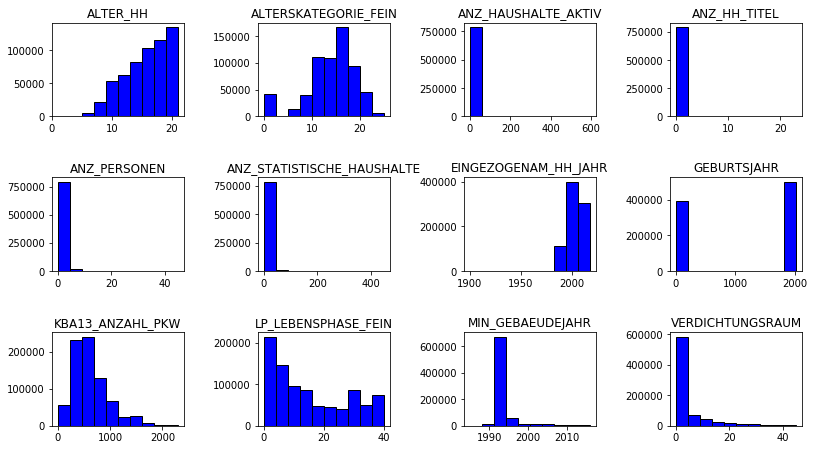

In [162]:
distribution_graphs(big_cat_columns)

In [334]:
#get the list of columns that doest have any nan values

na_list = azdias.columns[azdias.isna().any()].tolist()
col = azdias.columns.tolist()

# not_list = set(col)- set(na_list)

In [368]:
len(na_list)

265

In [361]:
#print the 0 value count of the not_list
zero_list =[]
for i in range(85):
    column = not_list[i]
    count = len(azdias[azdias[column]==0])
    if count >0:
        zero_list.append(column)
        print('{}---{}'.format(column, count))
    

D19_BANKEN_ANZ_12---831734
D19_BANKEN_ANZ_24---794100
D19_BANKEN_DIREKT---728811
D19_BANKEN_GROSS---785351
D19_BANKEN_LOKAL---874745
D19_BANKEN_REST---821760
D19_BEKLEIDUNG_GEH---809304
D19_BEKLEIDUNG_REST---692502
D19_BILDUNG---813156
D19_BIO_OEKO---854074
D19_BUCH_CD---622788
D19_DIGIT_SERV---857661
D19_DROGERIEARTIKEL---761014
D19_ENERGIE---829857
D19_FREIZEIT---790748
D19_GARTEN---851626
D19_GESAMT_ANZ_12---584797
D19_GESAMT_ANZ_24---505303
D19_HANDWERK---768381
D19_HAUS_DEKO---713100
D19_KINDERARTIKEL---749365
D19_KOSMETIK---745836
D19_LEBENSMITTEL---837914
D19_NAHRUNGSERGAENZUNG---852176
D19_RATGEBER---805071
D19_REISEN---736924
D19_SAMMELARTIKEL---802085
D19_SCHUHE---773024
D19_SONSTIGE---505953
D19_TECHNIK---630101
D19_TELKO_ANZ_12---857990
D19_TELKO_ANZ_24---826208
D19_TELKO_MOBILE---726804
D19_TELKO_REST---765973
D19_TIERARTIKEL---852220
D19_VERSAND_ANZ_12---637972
D19_VERSAND_ANZ_24---563818
D19_VERSAND_REST---734442
D19_VERSICHERUNGEN---654664
D19_VERSI_ANZ_12---821289
D19_

### Saving the Azdias file with all data convert

In [362]:
#save the part cleaned azsias file
azdias.to_csv("azdias_part_cleaned.zip",compression="zip")

### Filling missing values

In [3]:
azdias = pd.read_csv("azdias_part_cleaned.zip",compression='zip')

In [4]:
na_list = azdias.columns[azdias.isna().any()].tolist()

In [6]:
len(na_list)

265

In [365]:
# r = azdias['D19_BANKEN_ANZ_12'].mode(dropna=True).iloc[0]

In [5]:
for column in na_list:
     azdias[column].fillna(value= azdias[column].mode(dropna=True).iloc[0], inplace=True)

In [6]:
check_list = azdias.columns[azdias.isna().any()].tolist()
len(check_list)

0

### PCA

In [7]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 352 entries, Unnamed: 0 to ANZ_PERSONEN_2
dtypes: float64(265), int64(87)
memory usage: 2.3 GB


In [29]:
#model pca and plot the variance
from sklearn.decomposition import PCA
from scipy.interpolate import make_interp_spline, BSpline

def pca_variance(matrix, components):  #function to model pca and plot the variance graph
    variance = []
    for value in components:
        my_model = PCA(n_components=value)  #model the pca
        my_model.fit_transform(matrix)   
        variance.append(my_model.explained_variance_ratio_.cumsum()[value-1])  #get the variace value
    print(variance)
    print(components)
        
    #plot the variace
    components_smooth = np.linspace(components[0], components[-1], 10)  #10 points are selected to get a smooth line
    spl = make_interp_spline(components, variance, k=3)  # type: BSpline
    varaince_smooth = spl(xnew)
    
    plt.scatter(components, variance)   #plot the scatter variance graph
    plt.plot(components_smooth, varaince_smooth)  #plot the smooth line
    plt.ylabel("Variance Covered")
    plt.xlabel("PCA Components")
    plt.title("Variance covered by PCA Components")
    plt.show()

[0.2895337247977569, 0.4907732092251974, 0.7995186457742444, 0.9457937358872053]
[1, 2, 4, 6]


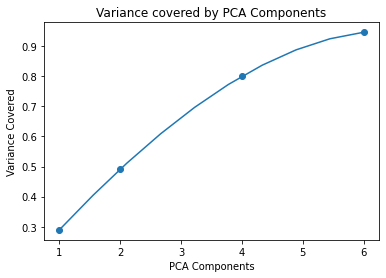

In [30]:
#testcode
np.random.seed(0)
my_matrix = np.random.randn(20, 8)
my_components = [1,2,4,6]

pca_variance(my_matrix,my_components)

# Actual Code
# components = [130, 150,170, 190]
# pca_variance(azdias,my_components)